In [1]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *  

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load iris file 
iris = pd.read_csv("iris.csv")  # Update this path as per your mc 

<Figure size 400x400 with 0 Axes>

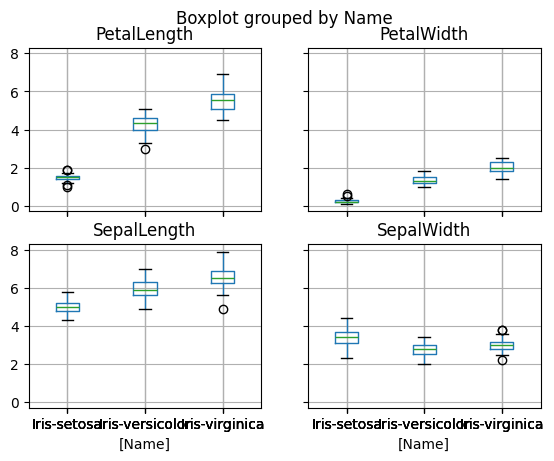

In [3]:
plt.figure(figsize=(4,4))
iris.boxplot(by='Name')
plt.savefig('b.png')

# Regression

In [12]:
dc = """

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

"""

In [27]:
#Step-1 - Load DATA 
boston = pd.read_csv(r"code\data\boston.csv")
boston.head()
y = boston['medv']        #vector in lowercase, 2D in uppercase 
data = boston.iloc[:, :-1]
#Step 2 - any preprocessing?
#many available, check later
#but, one is almost always used , all features are converted to 0 mean, 1 sd 
#such that one feature does not dominate other 
scaler = StandardScaler()
X = scaler.fit_transform(data)
X
#Step3 - how do i test
X_train, X_test , y_train, y_test = train_test_split(X, y, random_state=0)
#step4- find model
m = LinearRegression().fit(X_train, y_train)
#step5- what is model
m.coef_, m.intercept_
header=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"]
print(list(zip(header,m.coef_)))

#step6- is model good
m.score(X_train, y_train)  # R^2
m.score(X_test, y_test) 
#step7 - predict etc 
yHat = m.predict(X_test)
print(yHat)

[('crim', -1.0117042095356168), ('zn', 1.025581077654857), ('indus', -0.039532376137576875), ('chas', 0.6073123853208646), ('nox', -1.8046799573238186), ('rm', 2.6455232834373996), ('age', -0.19783647749919098), ('dis', -3.0186150011783535), ('rad', 2.088381603833394), ('tax', -1.902128787421239), ('ptratio', -2.1315455887017336), ('b', 0.7701713362571959), ('lstat', -3.560700049004267)]
[24.95233283 23.61699724 29.20588553 11.96070515 21.33362042 19.46954895
 20.42228421 21.52044058 18.98954101 19.950983    4.92468244 16.09694058
 16.93599574  5.33508402 39.84434398 32.33549843 22.32772572 36.54017819
 31.03300611 23.32172503 24.92086498 24.26106474 20.71504422 30.45072552
 22.45009234  9.87470006 17.70324412 17.974775   35.69932012 20.7940972
 18.10554174 17.68317865 19.71354713 23.79693873 29.06528958 19.23738284
 10.97815878 24.56199978 17.32913052 15.20340817 26.09337458 20.87706795
 22.26187518 15.32582693 22.85847963 25.08887173 19.74138819 22.70744911
  9.66708558 24.46175926 2

In [21]:
X.shape

(506, 13)

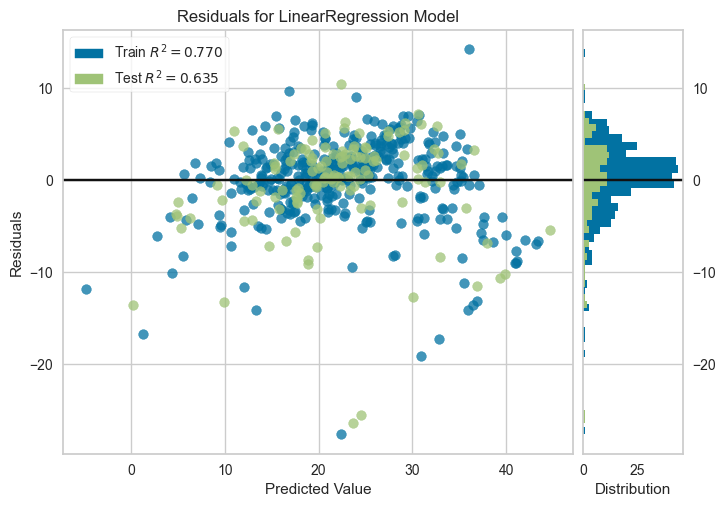

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [28]:
# Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(m)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# classification

In [29]:
iris = pd.read_csv(r"code\data\iris.csv")
iris.head()

SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa

In [30]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
enc = LabelEncoder()
y_raw = iris.Name
X = iris.iloc[:, :4]
y = enc.fit_transform(y_raw)

In [33]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
X

SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]

In [35]:
pca = PCA(n_components=1)
sel = SelectKBest(chi2, k=1)
feats = FeatureUnion([('pca', pca),('sel', sel)])  #list of tuples, key, value

In [39]:
lr = LogisticRegression()   # not regression
pipeline = Pipeline([('cf', feats),('lr', lr)])


In [40]:
#splittest and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
pipeline

Pipeline(steps=[('cf',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=1)),
                                                ('sel',
                                                 SelectKBest(k=1,
                                                             score_func=<function chi2 at 0x0000020492694FE0>))])),
                ('lr', LogisticRegression())])

In [42]:
#what is hyper parameters -?
#model parameters - coef, intercept 
#hyperparameters - Check __init__ method 
#How do i find best hyperparameter - automated searching 
params = dict(lr__C = [0.1, 1, 100], cf__pca__n_components=[1,2])
m = RandomizedSearchCV(pipeline, params, cv=5)  # 5-Fold CV
m.fit(X_train, y_train)
best_model = m.best_estimator_

C:\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [43]:
best_model.score(X_train, y_train)  #accuracy -> 1 is best

0.9555555555555556

In [45]:
best_model.score(X_test, y_test) #accuracy-> 1 is the best

1.0

In [46]:
yHat = best_model.predict(X_test)

In [48]:
#confusion matrix
confusion_matrix(y_test, yHat)

array([[7, 0, 0],
       [0, 5, 0],
       [0, 0, 3]], dtype=int64)

In [50]:
confusion_matrix(y_train, best_model.predict(X_train))

array([[43,  0,  0],
       [ 0, 42,  3],
       [ 0,  3, 44]], dtype=int64)

In [53]:
print(best_model)

Pipeline(steps=[('cf',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=2)),
                                                ('sel',
                                                 SelectKBest(k=1,
                                                             score_func=<function chi2 at 0x0000020492694FE0>))])),
                ('lr', LogisticRegression(C=1))])


C:\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


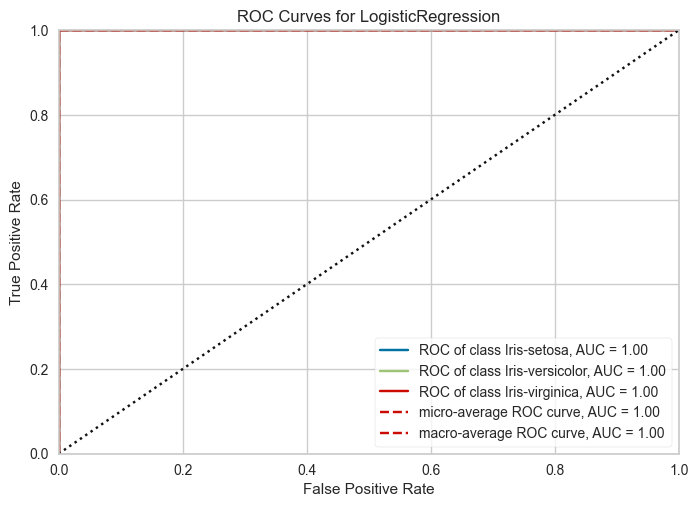

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [55]:
#ROAUC 
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(best_model, classes=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure
